In [1]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
matplotlib.rcParams['contour.negative_linestyle']= 'dashed'
plt.rcParams['image.cmap'] = 'viridis'

from progress_bar import *
from useful import *
from soms import Som

from eofs.xarray import Eof as eof

global data_dir
data_dir = '/scratch/ap587/dry_data/'

In [2]:
exp = 'exp2_hc50.0'

ds = open_zmean_runset(data_dir,exp)
ds = ds.isel(time=slice(720,None))

[74, 164, 254, 344]
[ 0.33611111  0.16388889  0.325       0.175     ]


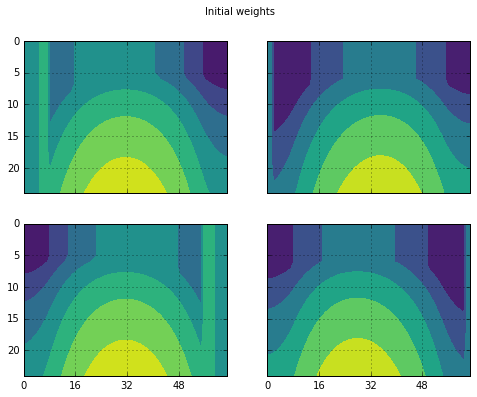

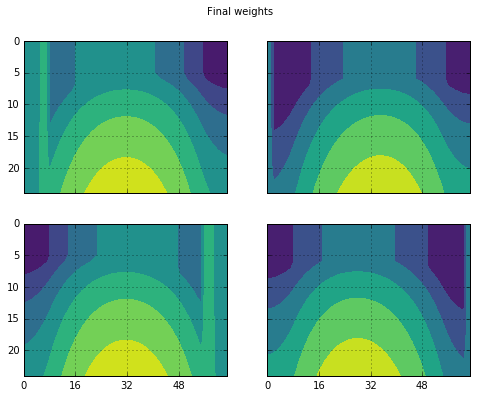

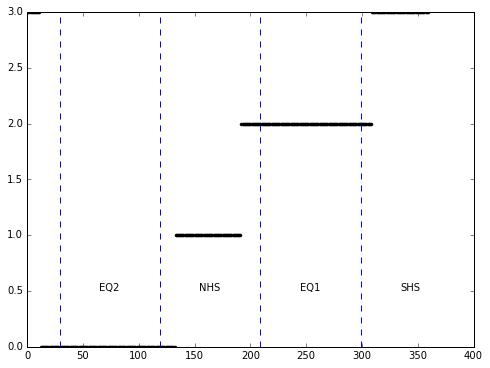

In [4]:
#--- test initializing SoMs with specific data indices.

data = ds.teq
lag = calc_seasonal_lag(ds.teq)
inits = list((np.arange(lag,lag+360, 90))%360)
print inits

mapshape = [2,2]
som = Som(data.values, mapshape=mapshape, do_shuffle=True, l_rate=0.01, map_rad = 0.1, weight_inds = inits)

fig, axs = plt.subplots(mapshape[0],mapshape[1], sharex=True, sharey=True)
for i, ax in enumerate(axs.reshape(-1)):
    ax.contourf(som.weights[i])
    ax.grid(True)
    ax.set_xticks(np.arange(0,som.weights.shape[-1],som.weights.shape[-1]/4))
ax.invert_yaxis()
fig.suptitle('Initial weights')

som.train()

fig, axs = plt.subplots(mapshape[0],mapshape[1], sharex=True, sharey=True)
for i, ax in enumerate(axs.reshape(-1)):
    ax.contourf(som.weights[i])
    ax.grid(True)
    ax.set_xticks(np.arange(0,som.weights.shape[-1],som.weights.shape[-1]/4))
ax.invert_yaxis()
fig.suptitle('Final weights')


mm = data.groupby('day').mean('time')
bmus = som.calc_bmus(mm)

fig, ax = plt.subplots()
ax.plot(bmus, 'k.')
labels = ['NHS', 'EQ1', 'SHS', 'EQ2']
bounds = np.array([45,135,225,315])
modbounds = (bounds + lag)%360
[ax.axvline(x, color='b', ls = '--') for x in modbounds]
[ax.text(modbounds[i]+35, 0.5, labels[i]) for i in range(4)]

a, bmu_freqs = np.unique(bmus, return_counts=True)
bmu_freqs = bmu_freqs/np.sum(bmu_freqs)
print(bmu_freqs)

In [23]:
som.y_pos

array([ 0.25,  0.25,  0.75,  0.75])

(4, 25, 64)

In [3]:
data = ds.temp
print(data)
lag = calc_seasonal_lag(ds.teq)
print lag
#som = Som(ds.)

<xarray.DataArray 'temp' (time: 1440, pfull: 25, lat: 64)>
dask.array<getitem..., shape=(1440, 25, 64), dtype=float64, chunksize=(90, 25, 64)>
Coordinates:
    height   (pfull) float64 2.911e+04 1.955e+04 1.594e+04 1.359e+04 ...
    year     (time) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
  * pfull    (pfull) float64 14.72 58.86 99.33 139.5 179.6 219.7 259.7 299.8 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
    day      (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * time     (time) float64 720.0 721.0 722.0 723.0 724.0 725.0 726.0 727.0 ...
74


In [4]:
mapshape = [2,2]
som = Som(data.values, mapshape=mapshape, do_shuffle=True, l_rate=0.05)
som.train()

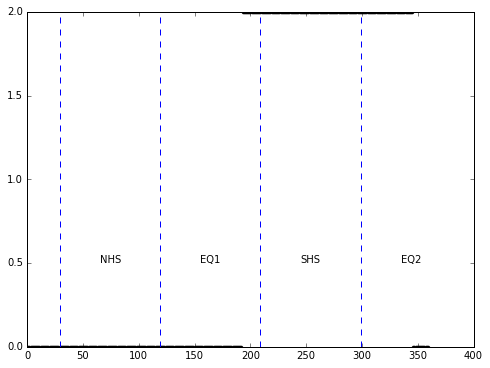

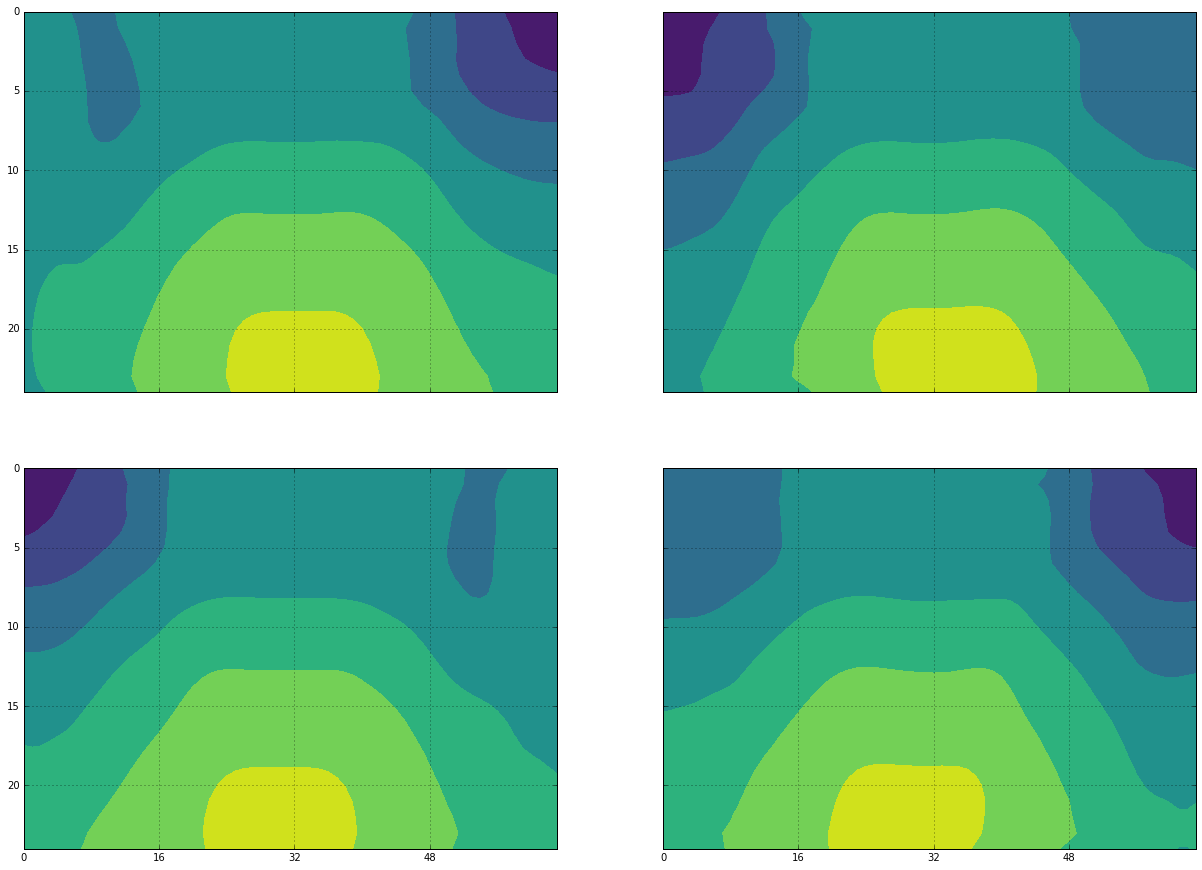

In [27]:
fig, axs = plt.subplots(mapshape[0],mapshape[1], figsize=(21,15), sharex=True, sharey=True)

for i, ax in enumerate(axs.reshape(-1)):
    ax.contourf(som.weights[i])
    ax.grid(True)
    ax.set_xticks(np.arange(0,som.weights.shape[-1],som.weights.shape[-1]/4))
ax.invert_yaxis()

In [7]:
som.weights.shape

(4, 25, 64)